# Hotel Customer Segmentation - Attrition Model Experimentation 

## Objective
### Model experiementation to find the optimal approach to predict a customer with attrition risk using supervised learning classfication models that can out perform the baseline Dummy Classifier from the previous notebook. 

## Metrics

* *AUC - ability to predict classes correctly. Probability that the classifier will rank a random positive instance higher than a negative instance. This will be our most important indicator of model success. 

* Cross Validation - resampling method to prevent overfitting that uses different portions of the data to test and train a model on different iterations. Shows how accurately a predictive model will perform in practice.

* Precsion- the ability of the classifier not to label as positive a sample that is negative. 

* Recall - the ability of the classifier to find all positive instances. 

* F1 - balance measure of Precion and Recall.

* Accuracy - The fraction of correct predictions out of the total predictions.

* Speed - how quickly the model can run. 

* Sanity - do the result seam realistic? Are we under or overfitting? Is the best model actually the best model for our business problem?

## Data

A variety of scaled and modeling ready dataframes with normalized RFM segments or clusters and/or with Persona Clusters.
a real-world customer dataset with 31 variables describes
83,590 instances (customers) from a hotel in Lisbon, Portugal.
Instances include; customer personal, behavioral,
demographic, and geographical information for 3 full years.
The dataset can be found on Kaggle [here].(https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

Kaggle dataset origin, domain assumptions and data collection information: 

Nuno Antonio, Ana de Almeida, Luis Nunes. A hotel's customer's personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015-2018). Data in Brief 33(2020)106583, 24(November), 2020. URL: https://www.sciencedirect.com/journal/data-in-brief.

## Data Assumptions

Data is aggreated and querried from company SQL database and provided in original flatfile.
* Some hotels have a policy of creating a profile for each guest companion(adult or children) only in particular cases and with authorization at times. 
* Typically a customer profile is created by one of three things:
    - customer's first checked-out at the hotel
    - customer's first cancelation
    - customer's first no-show
* Sometimes there are more than one profile for the same customer
* Only after the customer's first stay can hotels confirm the guest's personal details, such as nationality.
* The target label 'Attrition' is based on a conidtion of DaysSinceLastStay

## Process

1. PyCaret modeling unique dataframe analysis
2. Best model comparison
4. Best features
5. Best hyperparameters 

## Questions

1. Will our model perform better than our DummyClassifier and well enough to add into production and data flow?
2. What hyperperameters give the best resulst?
3. What are the most important features in the model?
4. What is the best approach and model? 
5. What are the prediction results?


## Considerations

1. There is no time snapshot of data therefore a churn observation/event window and a churn perfomrance perid window are not viable solutions for with our given data. 
2. Main scaled and modeling ready datasets:
    * Qantile RFM Segments, with or without Persona clusters.
    * KMeans RFM clusters, with or without Persona clusters.

## Import Data

In [1]:
from IPython.utils import io
with io.capture_output() as captured:
    %run 3_Pre-processing.ipynb

## Import New Libraries

In [ ]:
%pip install pycaret[full] --user

In [ ]:
%pip install markupsafe --user

In [ ]:
%pip install Jinja2 --user

In [2]:
import jinja2
from pycaret.classification import *
from functools import reduce

## PyCaret

### Run various modeling dataframes through the PyCaret package for quick model comparrison and best model seletion for each approach. 

#### RFM Quantile Segments

In [3]:
model_hotel_customer_rfm.loc[:,'ID'] = hotel_customer_rfm['ID']

In [4]:
cols = list(model_hotel_customer_rfm)
cols = [cols[-1]] + cols[:-1]
model_hotel_customer_rfm = model_hotel_customer_rfm[cols]

In [5]:
model_hotel_customer_rfm.head()

ID   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0   1  51.0                150               45           371.0         105.3   
1   2   0.0               1095               61           280.0          53.0   
2   4  60.0               1095               93           240.0          60.0   
3   6  54.0               1095               58           230.0          24.0   
4   8  32.0               1095               38           535.0          94.0   

   BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  \
0                 1                 0                  3              8   
1                 0                 0                  1             10   
2                 0                 0                  1             10   
3                 0                 0                  1              4   
4                 0                 0                  1             10   

   DaysSinceFirstStay  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0                1074            0           0                 0   
1                1100            0           0                 0   
2                1100            0           0                 0   
3                1097            0           0                 0   
4                1100            0           0                 0   

   SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0              0          0         0       0              0          0   
1              0          0         0       0              0          0   
2              0          0         0       0              0          0   
3              0          0         0       0              0          0   
4              0          0         0       0              1          0   

   SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  \
0               0                   0                     0            0   
1               0                   0                     0            0   
2               0                   0                     0            0   
3               0                   0                     0            0   
4               0                   0                     0            0   

   Attrition  Recency  Frequency  Monetary  RFM_Score  DistChannel_Corporate  \
0      False      151          5     476.3          8                      1   
1       True     1100          5     333.0          6                      0   
2       True     1100          5     300.0          6                      0   
3       True     1097          2     254.0          3                      0   
4       True     1100          5     629.0          7                      0   

   DistChannel_Direct  DistChannel_Electronic Distribution  \
0                   0                                    0   
1                   0                                    0   
2                   0                                    0   
3                   0                                    0   
4                   0                                    0   

   DistChannel_Travel Agent/Operator  MrkSegment_Aviation  \
0                                  0                    0   
1                                  1                    0   
2                                  1                    0   
3                                  1                    0   
4                                  1                    0   

   MrkSegment_Complementary  MrkSegment_Corporate  MrkSegment_Direct  \
0                         0                     1                  0   
1                         0                     0                  0   
2                         0                     0                  0   
3                         0                     0                  0   
4                         0                     0                  0   

   MrkSegment_Groups  MrkSegment_Other  MrkSegment_Travel Agent/Operator  \
0                 

Check for features with strong correlations to the target and remove to prevent leakage. 

<AxesSubplot:>

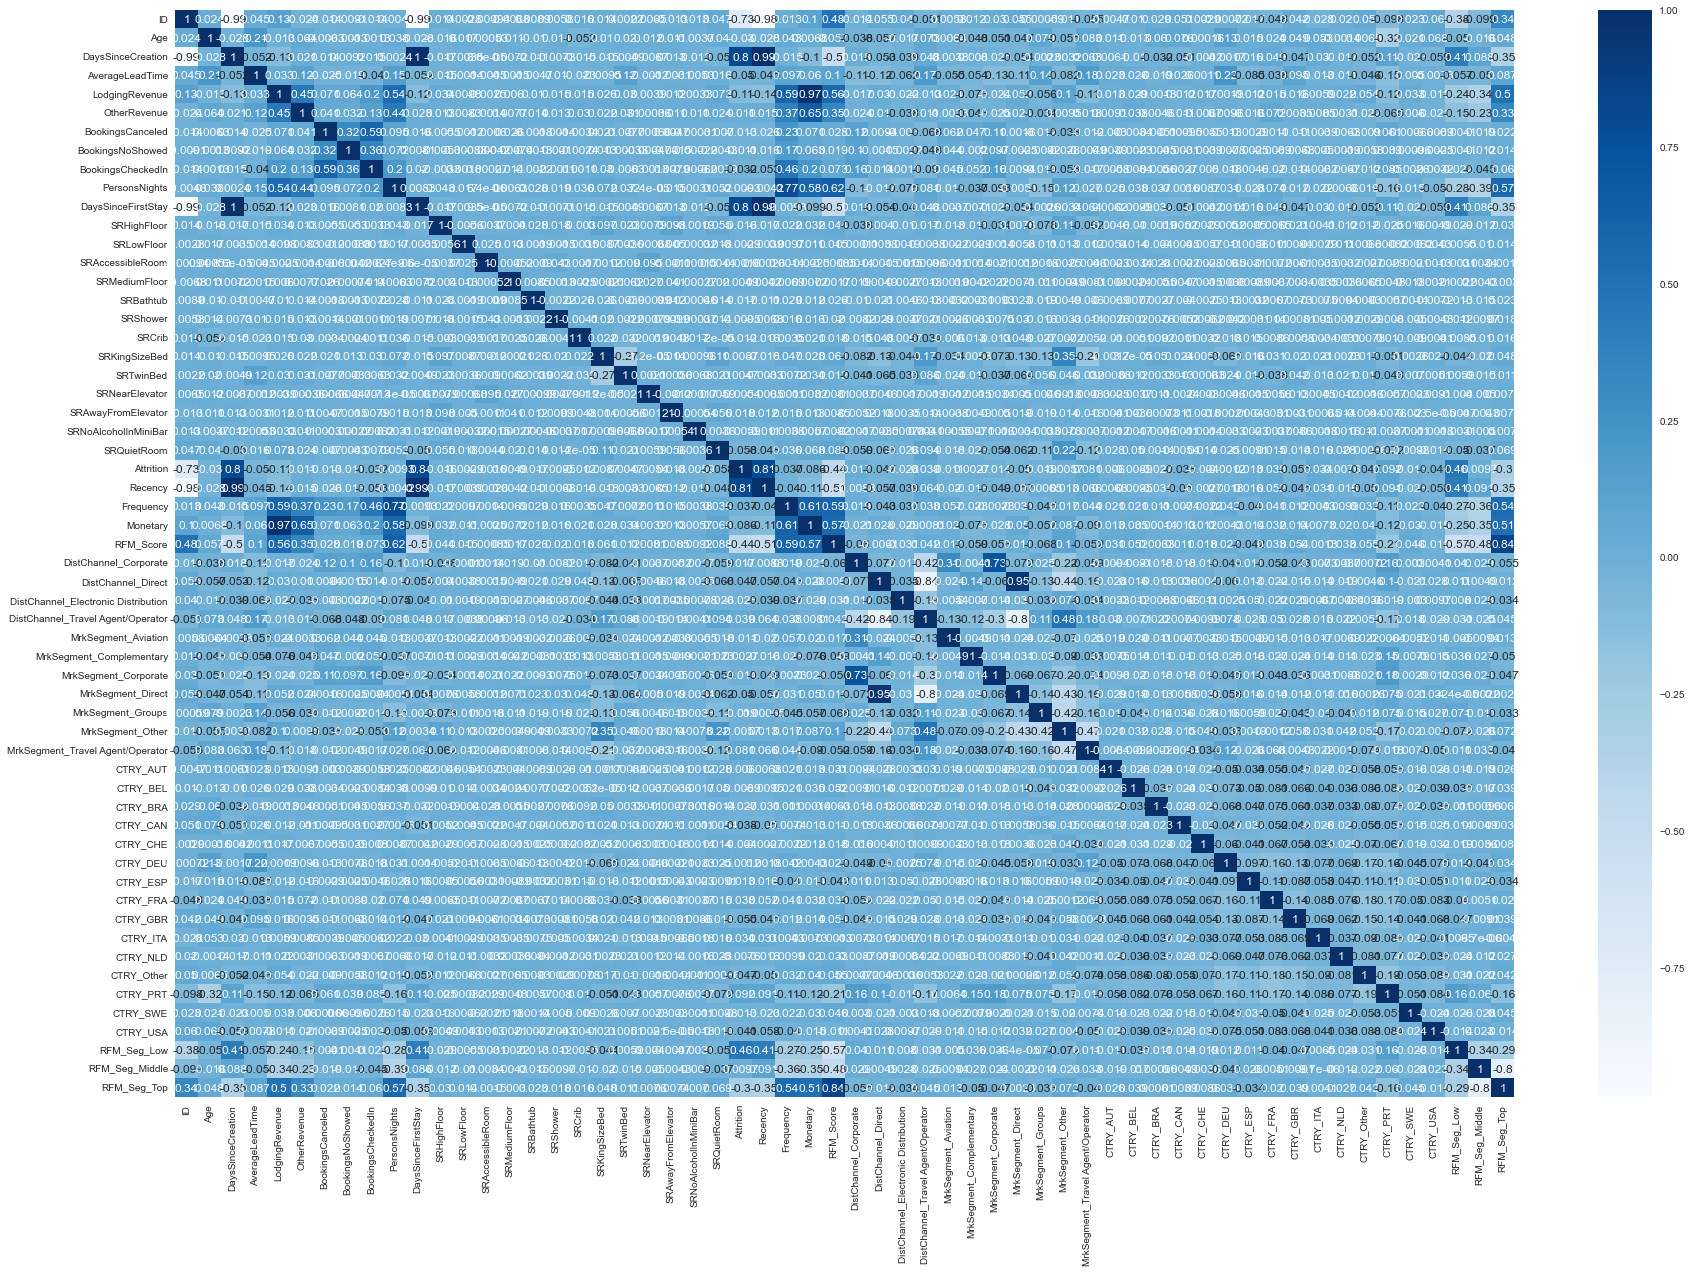

In [6]:
fig, ax = plt.subplots(figsize=(30, 20))

rfm_corr = model_hotel_customer_rfm.corr()
sns.heatmap(rfm_corr, cmap="Blues", annot= True, 
        xticklabels=rfm_corr.columns,
        yticklabels=rfm_corr.columns)

Further Preprocessing - after a few iterations of experimentation, this approach gave the most optimized results for this data version. 

Hide ID from modeling dataframe.

The RFM_Score used to set the RFM segment was removed from the dataframe to avoid any leakage. No feature selction modeling was done to avoid leakage. Remove other features highly correlated to the target feature. 

 I added peramaters to:
1. Implement overesampling using SMOTE to ajdust the 70/30 imbalance in the target feature. 

2. Implemnt feature selection with the assistance of feature importance parameter using Random Forest with the subset threshold at 80% of the dataset. THis avoids too much noise as well as over-fitting. 

3. Remove highly correlated features with correlation of 70% and above.

4. Normalize the data distribution using zscore. 

5. Remove outliers witiin 2.5% of either side of the distribution.


Build model parameters and verify dataframe metadata is accurate

In [7]:
py_SegmentClass = setup(model_hotel_customer_rfm, target = 'Attrition', fix_imbalance = True, ignore_features= ['ID', 'RFM_Score', 'Recency', 'DaysSinceFirstStay', 'DaysSinceCreation'],
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

In [8]:
py_SegmentClass = compare_models(sort= 'AUC', cross_validation= False)

Best model is Random Forest at 11.1 sec:

In [9]:
py_SegmentClass = create_model(py_SegmentClass, cross_validation= True, fold= 10)

Super low variance in the training iterations. Very high performance. Skeptical the results are too good to be true. 

#### Best Model, Best Paramaters Using Grid Search Paramater Optimization Method. 

Tune best model hyperparameters to optimze for the top indicator metric, AUC. 

In [10]:
tune_py_SegmentClass = tune_model(py_SegmentClass, optimize = 'AUC')

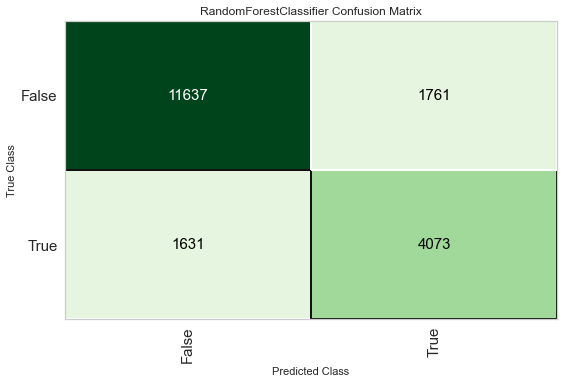

In [11]:
plot_model(tune_py_SegmentClass, plot = 'confusion_matrix')

This model has limited False positives to 8.5% of results. This means that 8.5% of customers who are actually at risk of attrition will be labeled not at risk which is a higher percentage than I think reasonible. We will explore why when we calulate the business value of the model.

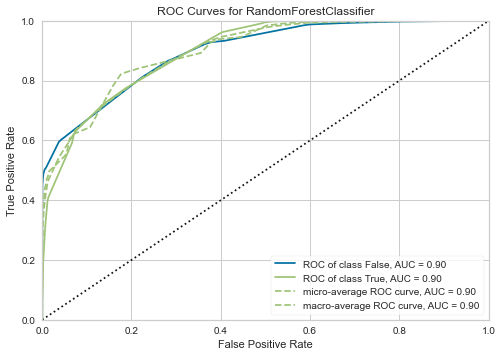

In [12]:
plot_model(tune_py_SegmentClass, plot = 'auc')

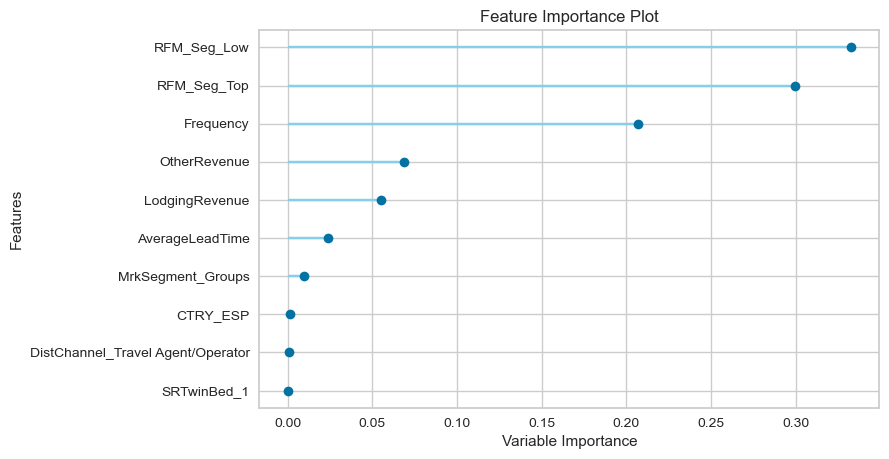

In [14]:
# Feature Importance

plot_model(tune_py_SegmentClass, plot = 'feature')

In [60]:
plot_model(tune_py_SegmentClass, plot = 'error')

ValueError: Estimator       Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8318  0.9088  0.7375  0.7276  0.7325  0.6099  0.6099
1       0.8281  0.9019  0.7231  0.7253  0.7242  0.5993  0.5993
2       0.8283  0.9054  0.7383  0.7192  0.7286  0.6031  0.6032
3       0.8309  0.9075  0.7421  0.7235  0.7326  0.6090  0.6091
4       0.8252  0.9021  0.7322  0.7149  0.7235  0.5957  0.5958
5       0.8198  0.8982  0.7196  0.7083  0.7139  0.5824  0.5824
6       0.8335  0.9063  0.7256  0.7373  0.7314  0.6108  0.6108
7       0.8177  0.8918  0.7173  0.7045  0.7109  0.5777  0.5778
8       0.8103  0.8898  0.7196  0.6879  0.7034  0.5641  0.5644
9       0.8266  0.9057  0.7224  0.7224  0.7224  0.5963  0.5963
Mean    0.8252  0.9018  0.7278  0.7171  0.7223  0.5948  0.5949
Std     0.0069  0.0062  0.0085  0.0132  0.0095  0.0147  0.0147 does not have the required fit() method.

In [21]:
tune_py_SegmentClass = pull()
print(tune_py_SegmentClass)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8318  0.9088  0.7375  0.7276  0.7325  0.6099  0.6099
1       0.8281  0.9019  0.7231  0.7253  0.7242  0.5993  0.5993
2       0.8283  0.9054  0.7383  0.7192  0.7286  0.6031  0.6032
3       0.8309  0.9075  0.7421  0.7235  0.7326  0.6090  0.6091
4       0.8252  0.9021  0.7322  0.7149  0.7235  0.5957  0.5958
5       0.8198  0.8982  0.7196  0.7083  0.7139  0.5824  0.5824
6       0.8335  0.9063  0.7256  0.7373  0.7314  0.6108  0.6108
7       0.8177  0.8918  0.7173  0.7045  0.7109  0.5777  0.5778
8       0.8103  0.8898  0.7196  0.6879  0.7034  0.5641  0.5644
9       0.8266  0.9057  0.7224  0.7224  0.7224  0.5963  0.5963
Mean    0.8252  0.9018  0.7278  0.7171  0.7223  0.5948  0.5949
Std     0.0069  0.0062  0.0085  0.0132  0.0095  0.0147  0.0147


In [22]:
tune_py_SegmentClass = pull()

results4 = tune_py_SegmentClass

In [24]:
results4 = results4.loc[['Mean', 'Std']]

results4['Model'] = 'tune_py_SegmentClass'

print(results4)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  \
Fold                                                             
Mean    0.8252  0.9018  0.7278  0.7171  0.7223  0.5948  0.5949   
Std     0.0069  0.0062  0.0085  0.0132  0.0095  0.0147  0.0147   

                     Model  
Fold                        
Mean  tune_py_SegmentClass  
Std   tune_py_SegmentClass  


citation: https://towardsdatascience.com/introduction-to-binary-classification-with-pycaret-a37b3e89ad8d#:~:text=PyCaret's%20classification%20module%20(%20pycaret.,on%20various%20techniques%20and%20algorithms.

#### RFM KMEans Clusters non-scaled

In [25]:
model_hotel_customer_rfm_cluster.loc[:,'ID'] = hotel_customer_rfm['ID']

In [26]:
cols = list(model_hotel_customer_rfm_cluster)
cols = [cols[-1]] + cols[:-1]
model_hotel_customer_rfm_cluster = model_hotel_customer_rfm_cluster[cols]

In [27]:
model_hotel_customer_rfm_cluster.head()

ID   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0   1  51.0                150               45           371.0         105.3   
1   2   0.0               1095               61           280.0          53.0   
2   4  60.0               1095               93           240.0          60.0   
3   6  54.0               1095               58           230.0          24.0   
4   8  32.0               1095               38           535.0          94.0   

   BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  ...  \
0                 1                 0                  3              8  ...   
1                 0                 0                  1             10  ...   
2                 0                 0                  1             10  ...   
3                 0                 0                  1              4  ...   
4                 0                 0                  1             10  ...   

   CTRY_GBR  CTRY_ITA  CTRY_NLD  CTRY_Other  CTRY_PRT  CTRY_SWE  CTRY_USA  \
0         0         0         0           0         1         0         0   
1         0         0         0           0         1         0         0   
2         0         0         0           0         0         0         0   
3         0         0         0           1         0         0         0   
4         0         0         0           0         0         0         0   

   RFM_Clus_Low  RFM_Clus_Mid  RFM_Clus_Top  
0             0             1             0  
1             0             1             0  
2             0             1             0  
3             0             1             0  
4             0             1             0  

[5 rows x 57 columns]

<AxesSubplot:>

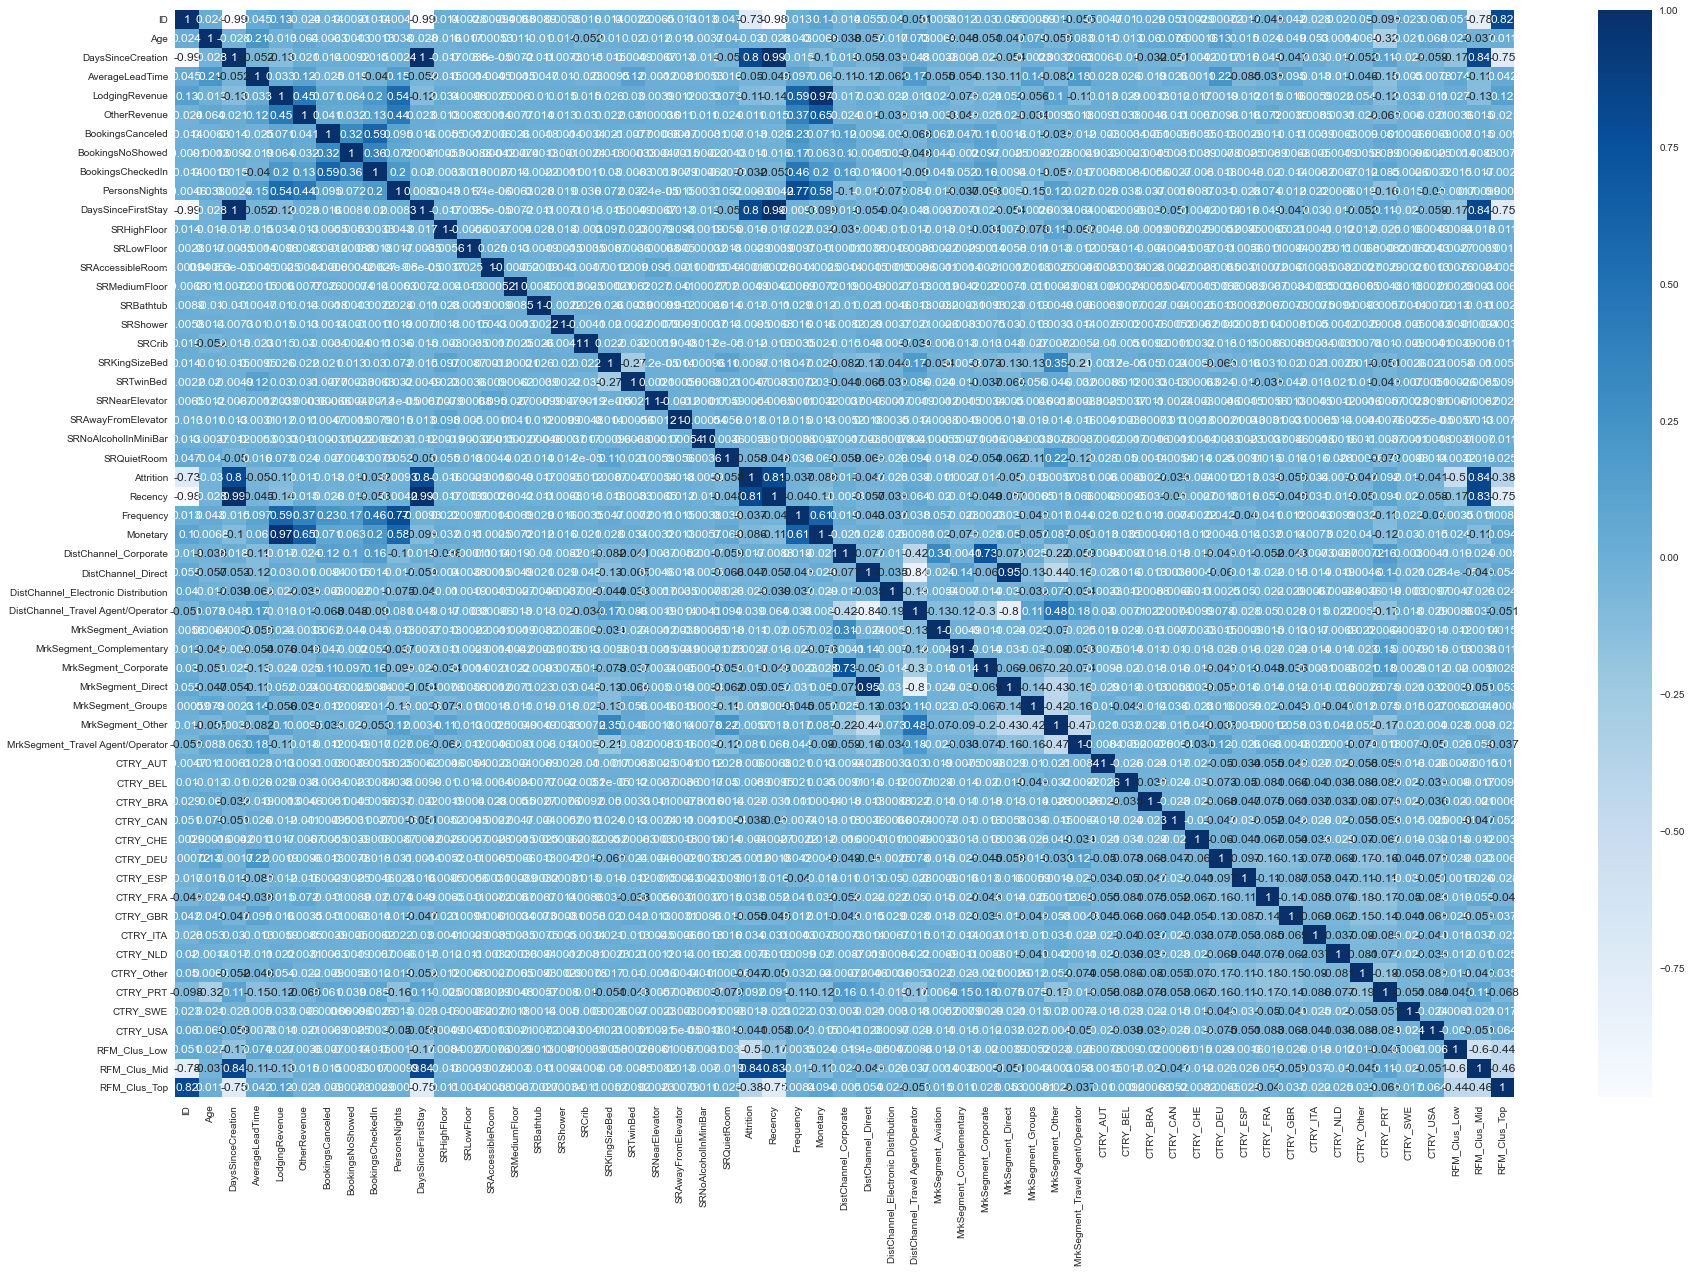

In [28]:
fig, ax = plt.subplots(figsize=(30, 20))

rfm_corr = model_hotel_customer_rfm_cluster.corr()
sns.heatmap(rfm_corr, cmap="Blues", annot= True, 
        xticklabels=rfm_corr.columns,
        yticklabels=rfm_corr.columns)

Features that are highly correlated to the target could be a probelm. Here we have 2 new correlations we will remove. 

In [29]:
py_ClusterClass = setup(model_hotel_customer_rfm_cluster, target = 'Attrition', ignore_features= ['ID', 'Recency', 'DaysSinceFirstStay', 'DaysSinceCreation'], fix_imbalance = True,
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

In [30]:
py_ClusterClass = compare_models(sort='AUC', cross_validation=False)

Best Model is Light Gradiant Boosting Machine at 12.59 sec

In [31]:
py_ClusterClass = create_model(py_ClusterClass, cross_validation= True, fold= 10)

In [32]:
tune_py_ClusterClass = tune_model(py_ClusterClass, optimize = 'AUC')

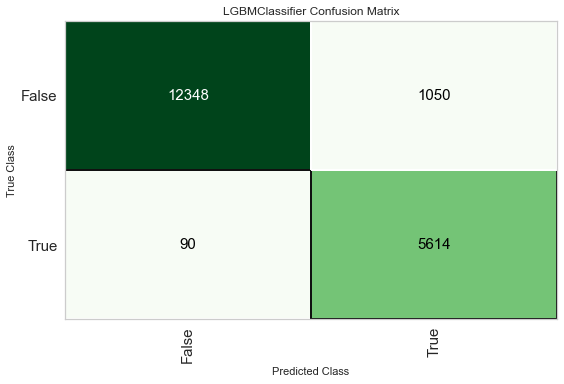

In [33]:
plot_model(tune_py_ClusterClass, plot = 'confusion_matrix')

Dramatically lowered the False Positives. 

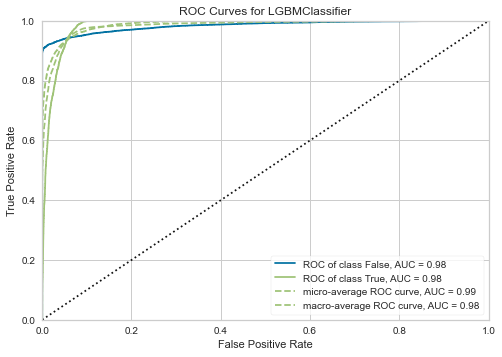

In [34]:
plot_model(tune_py_ClusterClass, plot = 'auc')

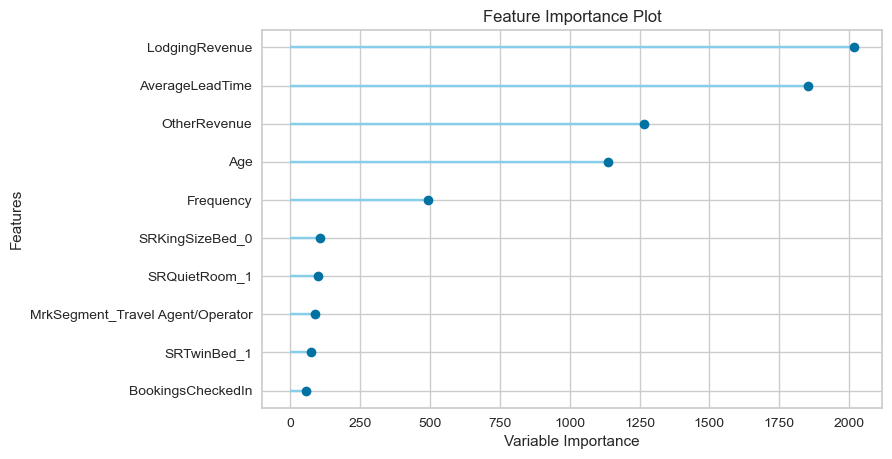

In [35]:
plot_model(tune_py_ClusterClass, plot = 'feature')

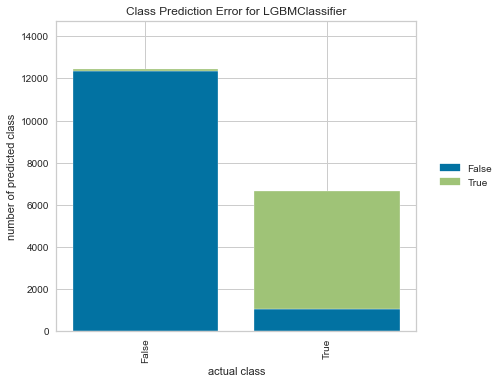

In [40]:
plot_model(tune_py_ClusterClass, plot = 'error')

In [41]:
tune_py_ClusterClass = pull()
print(tune_py_ClusterClass)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9414  0.9833  0.9819  0.8529  0.9129  0.8691  0.8740
1       0.9402  0.9847  0.9788  0.8520  0.9110  0.8664  0.8711
2       0.9421  0.9841  0.9788  0.8565  0.9136  0.8704  0.8748
3       0.9400  0.9830  0.9811  0.8500  0.9109  0.8660  0.8711
4       0.9438  0.9848  0.9887  0.8543  0.9166  0.8746  0.8799
5       0.9402  0.9829  0.9864  0.8474  0.9116  0.8669  0.8726
6       0.9436  0.9840  0.9811  0.8585  0.9157  0.8736  0.8780
7       0.9443  0.9849  0.9834  0.8587  0.9168  0.8752  0.8798
8       0.9462  0.9864  0.9864  0.8614  0.9197  0.8794  0.8840
9       0.9442  0.9859  0.9924  0.8531  0.9175  0.8757  0.8815
Mean    0.9426  0.9844  0.9839  0.8545  0.9146  0.8717  0.8767
Std     0.0020  0.0011  0.0042  0.0041  0.0029  0.0044  0.0043


In [42]:
tune_py_ClusterClass = pull()

results3 = tune_py_ClusterClass

In [43]:
results3 = results3.loc[['Mean', 'Std']]

results3['Model'] = 'tune_py_ClusterClass'

print(results3)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  \
Fold                                                             
Mean    0.9426  0.9844  0.9839  0.8545  0.9146  0.8717  0.8767   
Std     0.0020  0.0011  0.0042  0.0041  0.0029  0.0044  0.0043   

                     Model  
Fold                        
Mean  tune_py_ClusterClass  
Std   tune_py_ClusterClass  


####  RFM Quantile Segments + Persona Clusters

In [74]:
model_hotel_customer_rfm_persona= pd.merge(model_hotel_customer_rfm, RFM_segment_kmeans3['Persona_Cluster'], left_index=True, right_index=True)

In [75]:
model_hotel_customer_rfm_persona.loc[:,'ID'] = hotel_customer_rfm['ID']

In [76]:
model_hotel_customer_rfm_persona.head()

ID   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0   1  51.0                150               45           371.0         105.3   
1   2   0.0               1095               61           280.0          53.0   
2   4  60.0               1095               93           240.0          60.0   
3   6  54.0               1095               58           230.0          24.0   
4   8  32.0               1095               38           535.0          94.0   

   BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  ...  \
0                 1                 0                  3              8  ...   
1                 0                 0                  1             10  ...   
2                 0                 0                  1             10  ...   
3                 0                 0                  1              4  ...   
4                 0                 0                  1             10  ...   

   CTRY_ITA  CTRY_NLD  CTRY_Other  CTRY_PRT  CTRY_SWE  CTRY_USA  RFM_Seg_Low  \
0         0         0           0         1         0         0            0   
1         0         0           0         1         0         0            0   
2         0         0           0         0         0         0            0   
3         0         0           1         0         0         0            1   
4         0         0           0         0         0         0            0   

   RFM_Seg_Middle  RFM_Seg_Top  Persona_Cluster  
0               0            1                0  
1               1            0                1  
2               1            0                1  
3               0            0                1  
4               0            1                3  

[5 rows x 59 columns]

<AxesSubplot:>

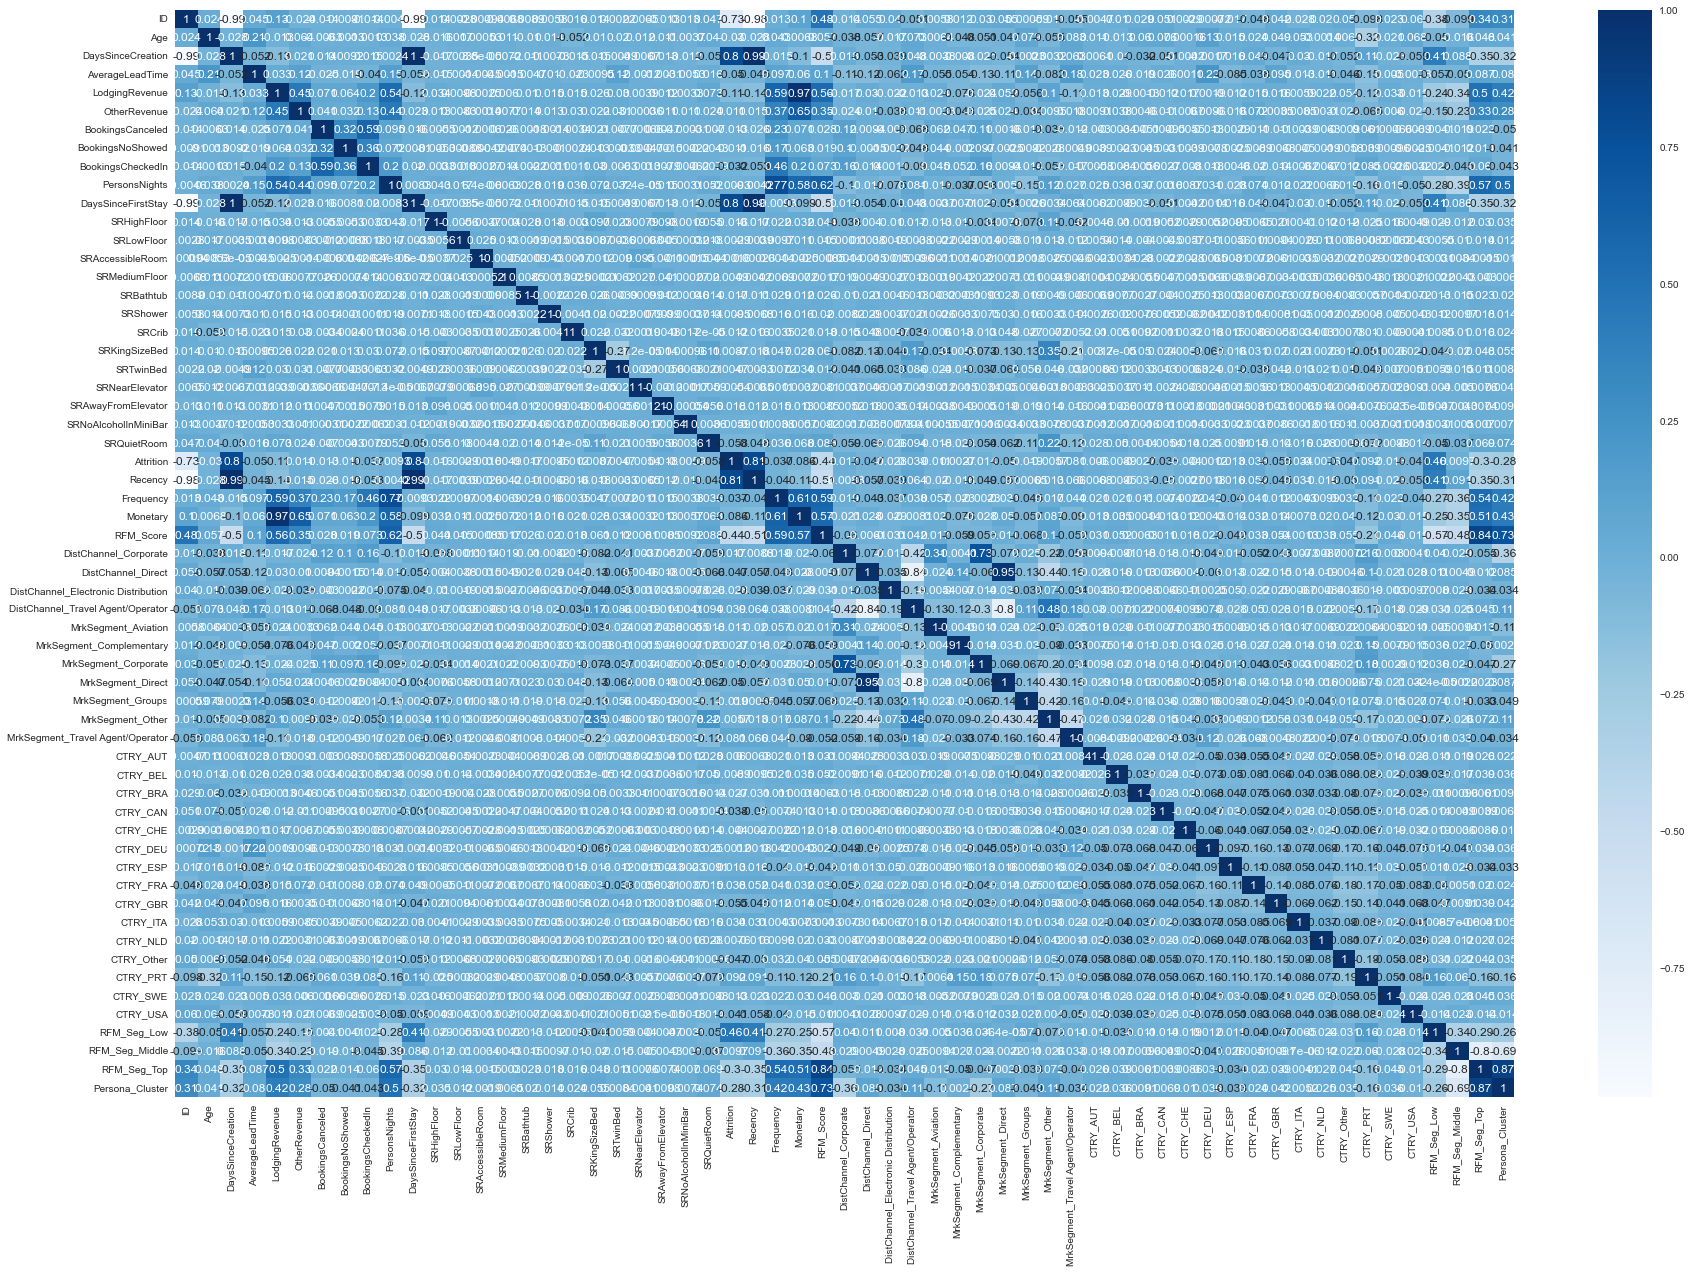

In [77]:
fig, ax = plt.subplots(figsize=(30, 20))

rfm_corr = model_hotel_customer_rfm_persona.corr()
sns.heatmap(rfm_corr, cmap="Blues", annot= True, 
        xticklabels=rfm_corr.columns,
        yticklabels=rfm_corr.columns)

In [78]:
py_Segment_Persona_Class = setup(model_hotel_customer_rfm_persona, target = 'Attrition', fix_imbalance = True, ignore_features= ['ID', 'RFM_Score', 'Recency', 'DaysSinceFirstStay', 'DaysSinceCreation'],
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

                                                        

In [79]:
py_Segment_Persona_Class= compare_models(sort= 'AUC', cross_validation= False)

Best model is Random Forest at 9.89 sec:

In [80]:
py_Segment_Persona_Class = create_model(py_Segment_Persona_Class, cross_validation= True, fold= 10)

In [81]:
tune_py_Segment_Persona_Class = tune_model(py_Segment_Persona_Class, optimize = 'AUC')

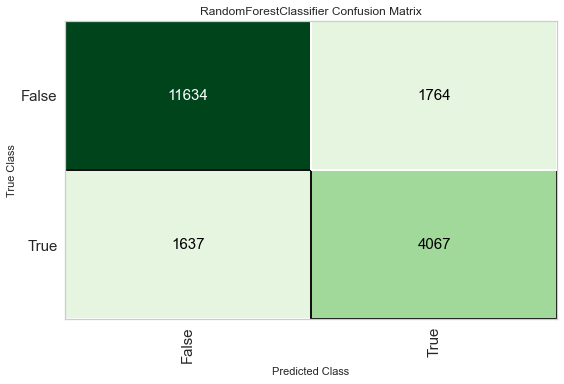

In [82]:
plot_model(tune_py_Segment_Persona_Class, plot = 'confusion_matrix')

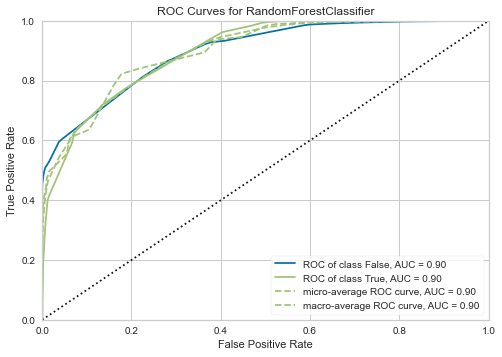

In [83]:
plot_model(tune_py_Segment_Persona_Class, plot = 'auc')

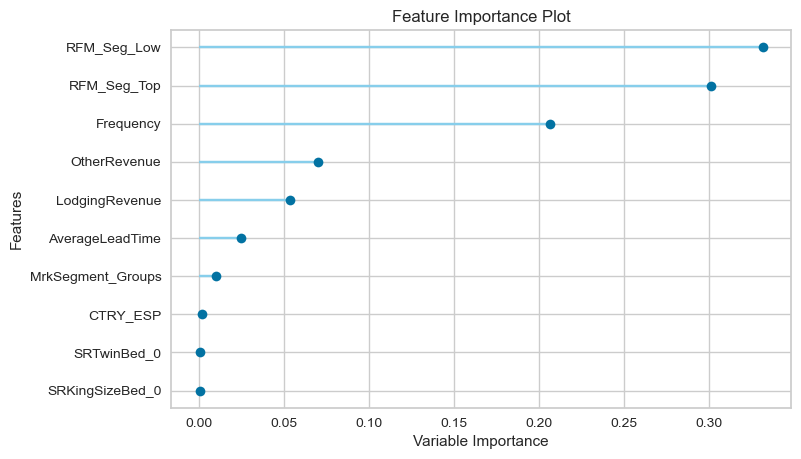

In [84]:
# Feature Importance

plot_model(tune_py_Segment_Persona_Class, plot = 'feature')

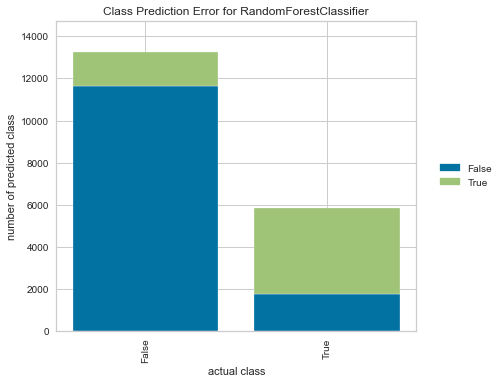

In [85]:
plot_model(tune_py_Segment_Persona_Class, plot = 'error')

In [86]:
tune_py_Segment_Persona_Class = pull()
print(tune_py_Segment_Persona_Class)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8318  0.9079  0.7330  0.7297  0.7313  0.6089  0.6089
1       0.8281  0.9021  0.7234  0.7255  0.7245  0.5995  0.5995
2       0.8292  0.9060  0.7370  0.7222  0.7295  0.6048  0.6048
3       0.8304  0.9075  0.7423  0.7226  0.7323  0.6082  0.6083
4       0.8248  0.8975  0.7317  0.7144  0.7229  0.5948  0.5949
5       0.8196  0.8980  0.7188  0.7081  0.7134  0.5818  0.5818
6       0.8333  0.9062  0.7271  0.7360  0.7316  0.6106  0.6107
7       0.7615  0.8931  0.8231  0.5839  0.6832  0.5006  0.5196
8       0.8103  0.8901  0.7181  0.6884  0.7029  0.5637  0.5640
9       0.8268  0.9058  0.7216  0.7233  0.7225  0.5966  0.5966
Mean    0.8196  0.9014  0.7376  0.7054  0.7194  0.5870  0.5889
Std     0.0204  0.0061  0.0295  0.0424  0.0149  0.0319  0.0268


In [87]:
tune_py_Segment_Persona_Class = pull()

results2 = tune_py_Segment_Persona_Class

In [88]:
results2 = results2.loc[['Mean', 'Std']]


results2['Model'] = 'tune_py_Segment_Persona_Class'

print(results2)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  \
Fold                                                             
Mean    0.8196  0.9014  0.7376  0.7054  0.7194  0.5870  0.5889   
Std     0.0204  0.0061  0.0295  0.0424  0.0149  0.0319  0.0268   

                              Model  
Fold                                 
Mean  tune_py_Segment_Persona_Class  
Std   tune_py_Segment_Persona_Class  


#### RFM KMeans Clusters + Persona Clusters

In [94]:
model_hotel_customer_rfm_cluster_persona= pd.merge(model_hotel_customer_rfm_cluster, RFM_cluster_kmeans3['Persona_Cluster'], left_index=True, right_index=True)

In [95]:
model_hotel_customer_rfm_cluster_persona.loc[:,'ID'] = hotel_customer_rfm['ID']

In [96]:
model_hotel_customer_rfm_cluster_persona.head()

ID   Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  OtherRevenue  \
0   1  51.0                150               45           371.0         105.3   
1   2   0.0               1095               61           280.0          53.0   
2   4  60.0               1095               93           240.0          60.0   
3   6  54.0               1095               58           230.0          24.0   
4   8  32.0               1095               38           535.0          94.0   

   BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  PersonsNights  ...  \
0                 1                 0                  3              8  ...   
1                 0                 0                  1             10  ...   
2                 0                 0                  1             10  ...   
3                 0                 0                  1              4  ...   
4                 0                 0                  1             10  ...   

   CTRY_ITA  CTRY_NLD  CTRY_Other  CTRY_PRT  CTRY_SWE  CTRY_USA  RFM_Clus_Low  \
0         0         0           0         1         0         0             0   
1         0         0           0         1         0         0             0   
2         0         0           0         0         0         0             0   
3         0         0           1         0         0         0             0   
4         0         0           0         0         0         0             0   

   RFM_Clus_Mid  RFM_Clus_Top  Persona_Cluster  
0             1             0                3  
1             1             0                2  
2             1             0                2  
3             1             0                2  
4             1             0                2  

[5 rows x 58 columns]

<AxesSubplot:>

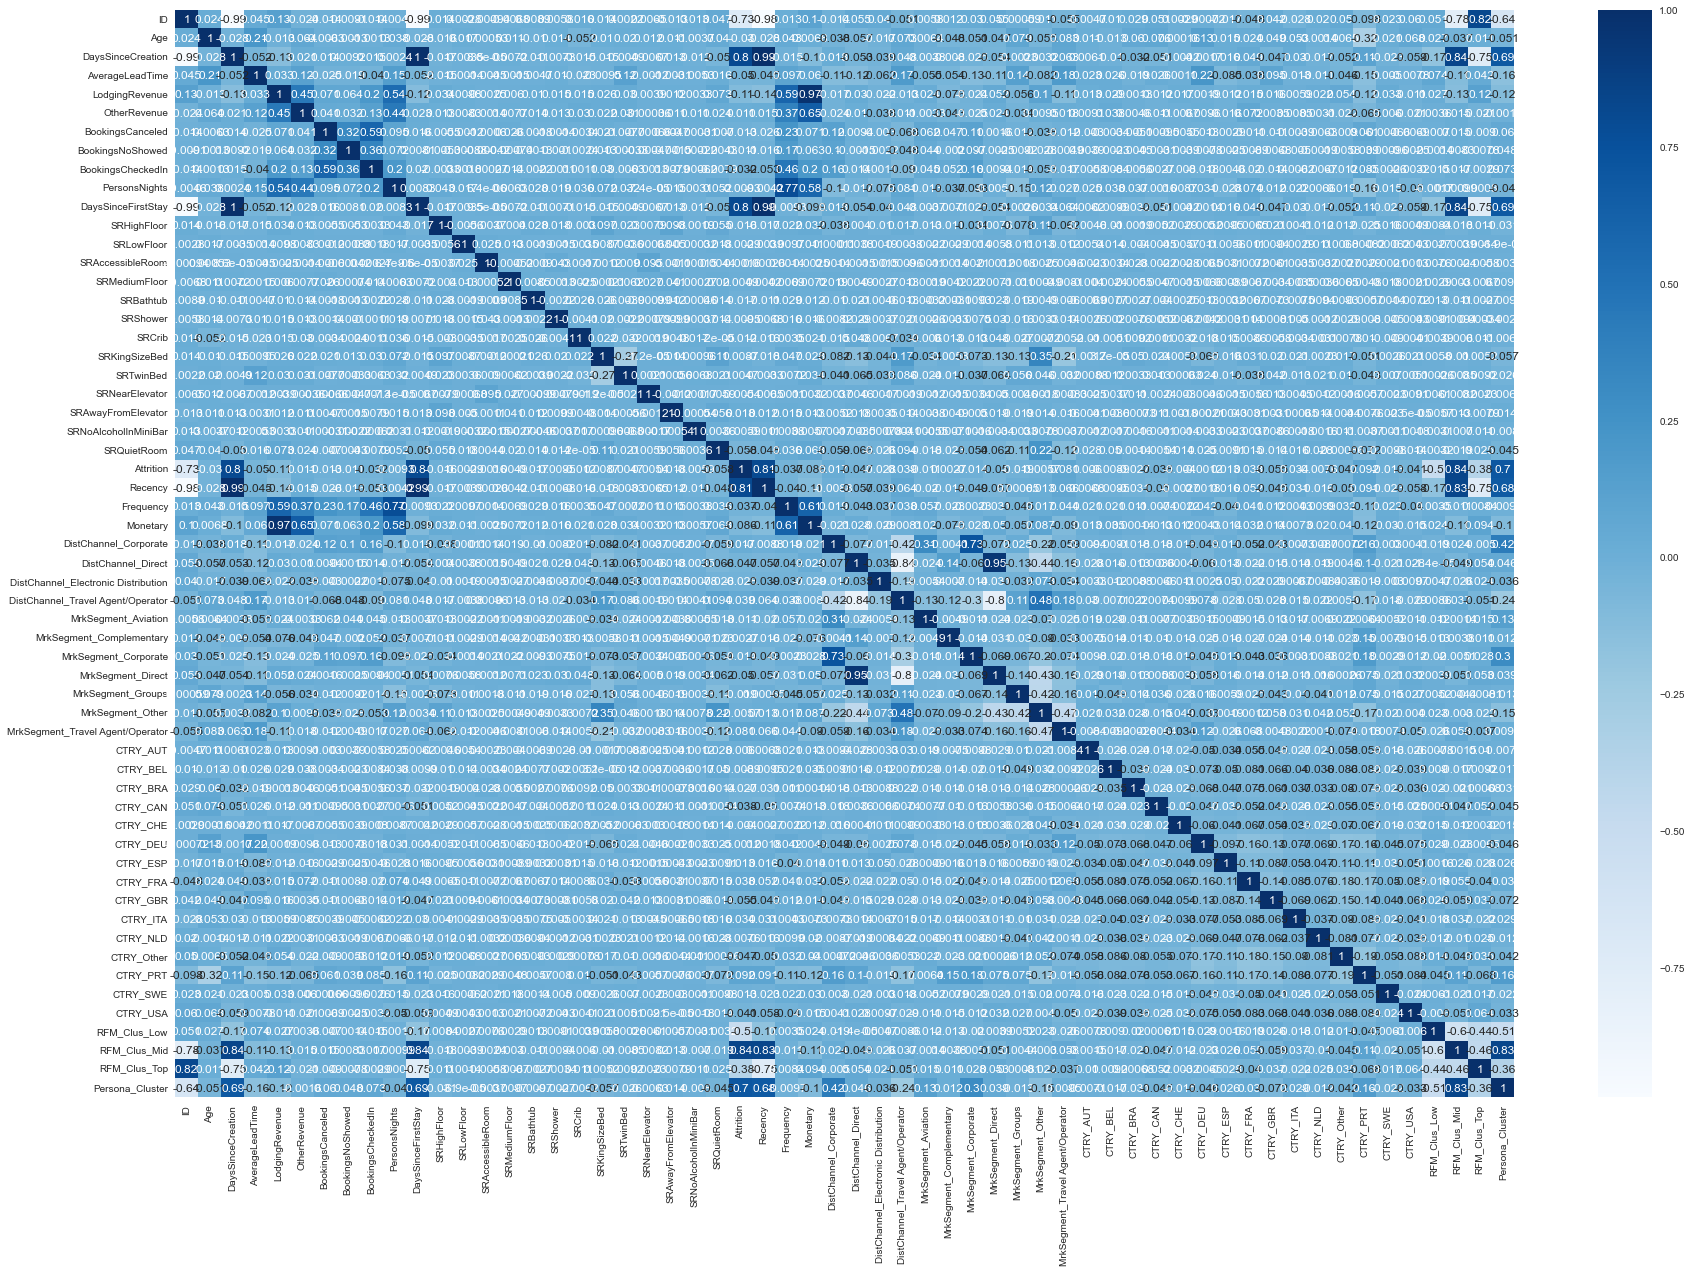

In [97]:
fig, ax = plt.subplots(figsize=(30, 20))

rfm_corr = model_hotel_customer_rfm_cluster_persona.corr()
sns.heatmap(rfm_corr, cmap="Blues", annot= True, 
        xticklabels=rfm_corr.columns,
        yticklabels=rfm_corr.columns)

In [98]:
py_Cluster_Persona_Class = setup(model_hotel_customer_rfm_cluster_persona, target = 'Attrition', ignore_features= ['ID', 'Recency', 'DaysSinceFirstStay', 'DaysSinceCreation'], fix_imbalance = True,
                                                        remove_multicollinearity = True, multicollinearity_threshold = 0.7, 
                                                        normalize = True, remove_outliers = True, session_id=123)

In [99]:
py_Cluster_Persona_Class = compare_models(sort= 'AUC', cross_validation= False)

Best model is Light Gradiant Boosting Machine at 7.74 sec

In [100]:
py_Cluster_Persona_Class = create_model(py_Cluster_Persona_Class, cross_validation= True, fold= 10)

In [101]:
tune_py_Cluster_Persona_Class =  tune_model(py_Cluster_Persona_Class, optimize = 'AUC')

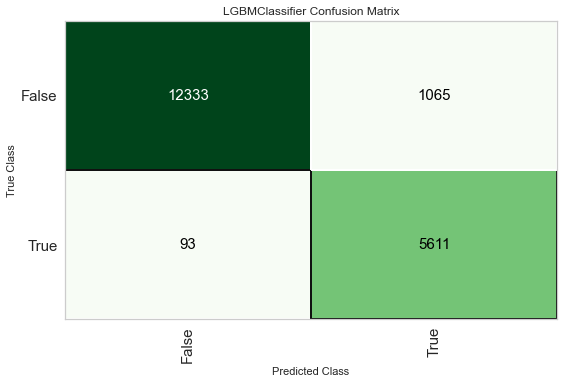

In [102]:
plot_model(tune_py_Cluster_Persona_Class, plot = 'confusion_matrix')

This approach and model does not seem to improve the amount of attrition-risk customers who are labeled non-risk. 

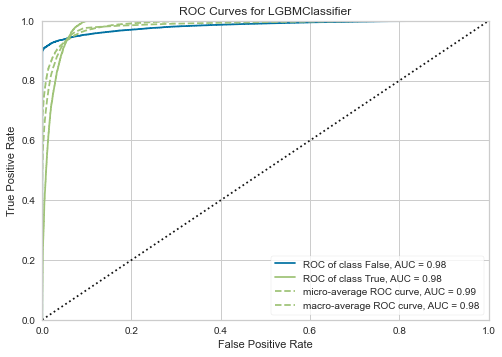

In [103]:
plot_model(tune_py_Cluster_Persona_Class, plot = 'auc')

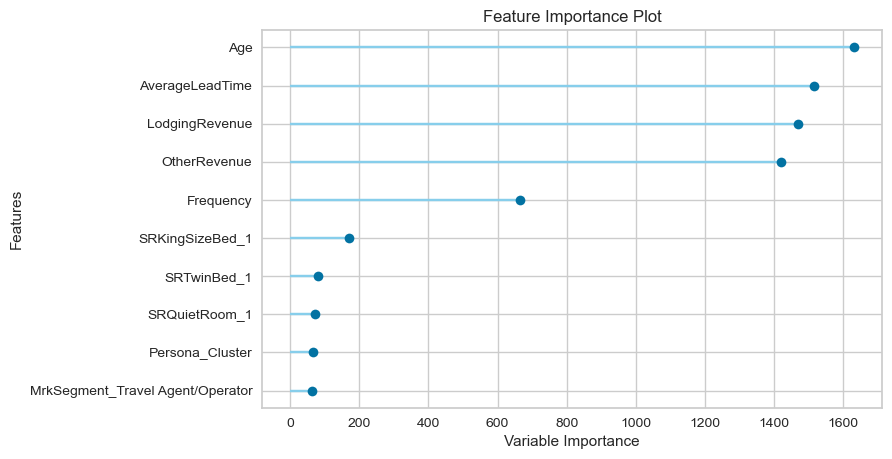

In [104]:
# Feature Importance

plot_model(tune_py_Cluster_Persona_Class, plot = 'feature')

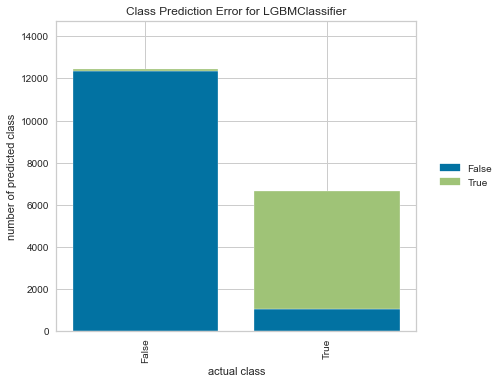

In [106]:
plot_model(tune_py_Cluster_Persona_Class, plot = 'error')

In [107]:
tune_py_Cluster_Persona_Class_results = pull()

results1 = tune_py_Cluster_Persona_Class_results

In [108]:
print(results1)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.9436  0.9830  0.9879  0.8542  0.9162  0.8740  0.8793
1       0.9428  0.9842  0.9826  0.8558  0.9148  0.8721  0.8769
2       0.9419  0.9833  0.9811  0.8545  0.9134  0.8700  0.8747
3       0.9428  0.9833  0.9856  0.8540  0.9151  0.8723  0.8774
4       0.9421  0.9841  0.9879  0.8509  0.9143  0.8710  0.8765
5       0.9369  0.9830  0.9811  0.8429  0.9067  0.8595  0.8652
6       0.9410  0.9836  0.9803  0.8527  0.9121  0.8680  0.8728
7       0.9450  0.9854  0.9856  0.8590  0.9180  0.8769  0.8816
8       0.9445  0.9871  0.9849  0.8584  0.9173  0.8758  0.8805
9       0.9445  0.9855  0.9917  0.8541  0.9177  0.8762  0.8818
Mean    0.9425  0.9842  0.9849  0.8537  0.9146  0.8716  0.8767
Std     0.0022  0.0013  0.0035  0.0043  0.0032  0.0049  0.0047


In [110]:
results1 = results1.loc[['Mean', 'Std']]

In [111]:
results1['Model'] = 'tune_py_Cluster_Persona_Class_results'

print(results1)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  \
Fold                                                             
Mean    0.9425  0.9842  0.9849  0.8537  0.9146  0.8716  0.8767   
Std     0.0022  0.0013  0.0035  0.0043  0.0032  0.0049  0.0047   

                                      Model  
Fold                                         
Mean  tune_py_Cluster_Persona_Class_results  
Std   tune_py_Cluster_Persona_Class_results  


## Evaluation Comparrison

In [112]:
dfs = [results1, results2, results3, results4]

results_comp = vertical_concat = pd.concat([results1, results2, results3, results4], axis=0)

results_comp

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC  \
Fold                                                             
Mean    0.9425  0.9842  0.9849  0.8537  0.9146  0.8716  0.8767   
Std     0.0022  0.0013  0.0035  0.0043  0.0032  0.0049  0.0047   
Mean    0.8196  0.9014  0.7376  0.7054  0.7194  0.5870  0.5889   
Std     0.0204  0.0061  0.0295  0.0424  0.0149  0.0319  0.0268   
Mean    0.9426  0.9844  0.9839  0.8545  0.9146  0.8717  0.8767   
Std     0.0020  0.0011  0.0042  0.0041  0.0029  0.0044  0.0043   
Mean    0.8252  0.9018  0.7278  0.7171  0.7223  0.5948  0.5949   
Std     0.0069  0.0062  0.0085  0.0132  0.0095  0.0147  0.0147   

                                      Model  
Fold                                         
Mean  tune_py_Cluster_Persona_Class_results  
Std   tune_py_Cluster_Persona_Class_results  
Mean          tune_py_Segment_Persona_Class  
Std           tune_py_Segment_Persona_Class  
Mean                   tune_py_ClusterClass  
Std                    tune_py_ClusterClass  
Mean                   tune_py_SegmentClass  
Std                    tune_py_SegmentClass

The Kmeans RFM Clusters approach with Light Gradient Boosting Machine algoriths had extremely high AUC scores with high Percision. It's 5sec slower than fastest best model  

## Best Approach

## Best Model

## Best Hyperperamters

## Plot confusion matrix of best model/ best preditions.

In [ ]:
cm = confusion_matrix(best_model, labels = best_model.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= best_model.classes_)
disp.plot()
plt.show()

## Prediction Errors

## Model Eval Interactive

## Conclusion

## Data Story

In [ ]:
file_name = 'Hotel_Customer_KMeans_RFM_Persona_Clusters.xlsx' 

Hotel_Customer_KMeans_RFM_Persona_Clusters.to_excel('Hotel_Customer_KMeans_RFM_Persona_Cluster.xlsx')


### Visit this data story analysis on [Tableau Public](https://public.tableau.com/app/profile/lnrobertson/viz/Hotel_Customer_Segmentation/Hotel_Customer_Segmentation?publish=yes)

* Cluster analysis visualizations
* Final analysis visualizations
* Data Flow Diagrams 
* Use and user cases
* Models and Evaluations
* Key Metrics Dashboard